<a href="https://colab.research.google.com/github/MaxEnger/Lab7-Geoparsing/blob/main/Enger_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Check to see if geopandas is already loaded into your Colab environment: will return True or False
import sys
'geopandas' in sys.modules

False

In [ ]:
# Install packages as needed
!pip install geopandas
!pip install geotext
!pip install numpy geotext
!pip install matplotlib
!pip install urllib #error
!pip install geopy
!pip install shapely
!pip install descartes
!pip install nltk

# Importing all the libraries we'll use
import geopandas as gpd
import pandas as pd
import nltk
import numpy as np
import matplotlib.pyplot as plt
import urllib.request#new
import descartes

from urllib import request
from geotext import GeoText
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from shapely.geometry import Point, Polygon

In [ ]:
#load url for gutenberg book - the chosen book for this script is War of the Worlds
url = 'https://www.gutenberg.org/files/36/36-0.txt'
response = request.urlopen(url)
raw = response.read().decode('utf8')
print(f'{type(raw)}, \n{len(raw)}, \n{raw[:501]}') 

In [ ]:
places = GeoText(raw)
cities = list(places.cities)
cities #Calling this shows my list of cities. You could also use print(cities)

In [ ]:
geolocator = Nominatim(user_agent='enger.max.1@gmail.com', timeout=2) # requires  e-mail address to track usage. Timeout set for 2 seconds.

#adding lat & lon to cities
lat_lon = []
for city in cities:
  try:
    location = geolocator.geocode(city)
    if location:
      # If you want to see only lat/lon as they process you can include the following code here but I found it added a lot of time to the operation: print(location.latitude, location.longitude)
      lat_lon.append(location)
  except GeocoderTimedOut as e:
    print("Error: geocode failed on input %s with message %s">
          (city, e))
lat_lon

In [ ]:
df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
df.head(7)

In [ ]:
geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
geometry[:7]

In [ ]:
# coordinate system we're using
crs = {'init': 'epsg:4326'}

# convert df to geo df
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

In [26]:
# Upload local script to Colab - running this creates a "choose file" button to upload local files.
# .shp file downloaded from https://hub.arcgis.com/datasets/a21fdb46d23e4ef896f31475217cbb08_1
from google.colab import files
uploaded = files.upload()

Saving Countries_WGS84.cpg to Countries_WGS84 (1).cpg
Saving Countries_WGS84.dbf to Countries_WGS84 (1).dbf
Saving Countries_WGS84.prj to Countries_WGS84 (1).prj
Saving Countries_WGS84.shp to Countries_WGS84 (2).shp
Saving Countries_WGS84.shx to Countries_WGS84 (1).shx


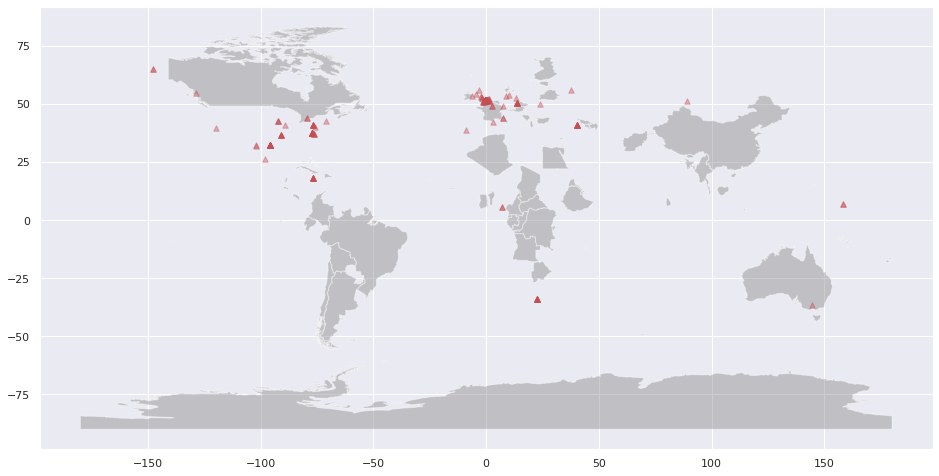

In [27]:
# world map .shp file we down/uploaded
countries_map = gpd.read_file('Countries_WGS84.shp')

f, ax = plt.subplots(figsize=(16, 16))
countries_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'r', marker = '^', alpha=.4)

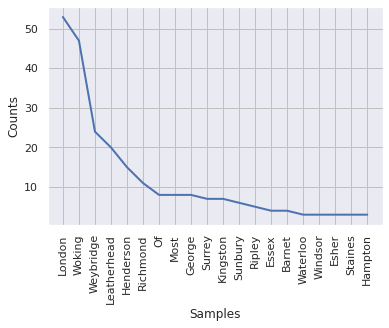

In [23]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns # used to set the style of the figures

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(cities)
freqdist1.plot(20) #running this w/out an argument plots all words! Here, we're specifying the top 20

In [ ]:
#import required libraries, packages, etc.
import folium
from folium import plugins
import json

# Converting geopandas dataframe to geojson so it can be plotted on a web map with folium.
geo_df['geometry'].to_file("WotW.geojson", driver='GeoJSON')

# initialize the map at a global scale with a point midaway between U.S. and Europe as the center.
WotWMap = folium.Map(location=[32.826919, -41.225228], tiles='Stamen Terrain', zoom_start=2)

folium.GeoJson("WotW.geojson").add_to(WotWMap)

# Display map   
WotWMap